In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
df = pd.read_csv('../data/moonson_timur/1989.csv', delimiter=',', header=0)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)
    print('\n\n\n\nJumlah data : ',len(df))

      Posisi_LS   Posisi_BT  Yellowfin  Bigeye  Albacore
0    -13.100000  113.566667          0       3         0
1    -13.216667  114.100000          0      17         2
2    -13.283333  114.466667          3      15         2
3    -13.266667  114.383333          0       8         4
4    -12.983333  114.516667          2       2         3
5    -13.483333  114.566667          4       2         2
6    -11.800000  114.683333          4       2         2
7    -11.983333  119.000000          4       0         0
8    -12.900000  115.500000         14       2         0
9    -13.266667  116.266667          4       0         0
10   -12.950000  116.750000         25       2        19
11   -12.883333  116.916667         22       0        13
12   -12.833333  117.833333          9       0         4
13   -14.283333  114.266667          6       0         6
14   -14.333333  114.583333         19       6         7
15   -13.750000  117.333333         20       3         5
16   -13.633333  117.983333    

In [3]:
# Generate some clusters!
# n_clusters = 50
# clusters_x, clusters_y = cluster_gen(n_clusters)

# # Convert to a single dataset in OpenCV format
# data = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()

data=df

X = StandardScaler().fit_transform(data)

# Define max_distance (eps parameter in DBSCAN())
db = DBSCAN(eps=1.5, min_samples=5).fit(data)

# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster = n_clusters + 1
unique_labels = set(labels)
n_noise_ = list(labels).count(-1)

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
print('Estimated number of clusters: %d' % n_clusters)
print('Total Data : ', len(data))
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 16
Total Data :  1559
Estimated number of noise points: 995
Silhouette Coefficient: -0.360


Text(0.5, 1.0, 'Original Data')

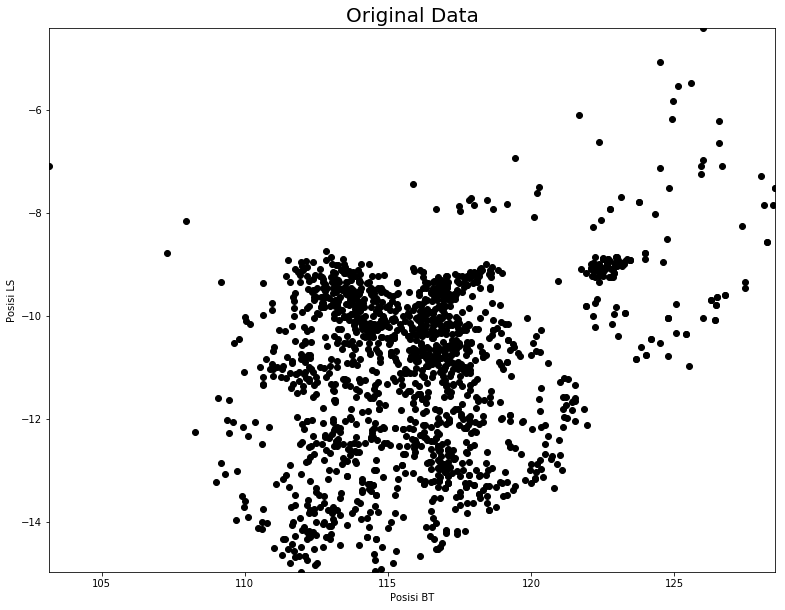

In [5]:
%matplotlib inline
# Plot up the results!
min_x = np.min(data['Posisi_BT'])
max_x = np.max(data['Posisi_BT'])
min_y = np.min(data['Posisi_LS'])
max_y = np.max(data['Posisi_LS'])

fig = plt.figure(figsize=(13,10))
plt.plot(data['Posisi_BT'], data['Posisi_LS'], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.ylabel('Posisi LS')
plt.xlabel('Posisi BT')
plt.title('Original Data', fontsize = 20)

<IPython.core.display.Javascript object>


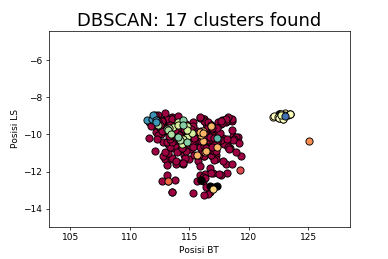


       Posisi_LS   Posisi_BT  Yellowfin  Bigeye  Albacore
0    -13.100000  113.566667          0       3         0
79   -12.200000  115.866667          0       3         0
93   -11.316667  114.950000          0       4         0
100  -12.116667  116.300000          0       3         0
128  -12.483333  113.200000          0       3         0
139  -13.083333  116.733333          0       0         3
143  -12.316667  116.116667          0       0         0
146  -13.166667  115.350000          0       3         0
158  -11.166667  119.316667          0       2         0
160  -11.600000  114.466667          0       0         0
220  -11.083333  114.583333          0       2         0
230  -11.316667  113.000000          0       2         0
264  -11.533333  114.266667          1       2         0
276  -11.183333  112.833333          1       3         0
278  -11.333333  113.500000          0       7         0
311  -11.116667  117.216667          1       2         1
312  -11.566667  118.083333  

In [7]:
%matplotlib notebook
# plt.subplt(122)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == 1:
        # block used noise.
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy['Posisi_BT'], xy['Posisi_LS'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)
    print('\n', xy,'\nMember of Cluster : ', len(xy))

    # xy = data[class_member_mask & ~core_samples_mask]
    # plt.plot(xy['Posisi_BT'], xy['Posisi_LS'], 'o', markerfacecolor=tuple(col),
             # markeredgecolor='k', markersize=3)
    
# Plot up the results!
# min_x = np.min(data['Posisi_BT'])
# max_x = np.max(data['Posisi_BT'])
# min_y = np.min(data['Posisi_LS'])
# max_y = np.max(data['Posisi_LS'])
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.ylabel('Posisi LS')
plt.xlabel('Posisi BT')
plt.title('DBSCAN: %d clusters found' % n_cluster, fontsize = 20)
fig.tight_layout()
plt.show()